In [53]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
import numpy as np
import scipy.stats as stats
import math

# Normal Approximation

#### Normal approximation to binomial distribution
The reason why we use it:
- It is easy for probability calculations
- the binomial distribution is perfectly symmetric if p = 0.5 and hs some skewness when p <> 0.5  
- the normal approxiamtion works best when p is close to 0.5 and when n is large
- roughly, the normal approxiamtion is reasonable if both np >= 10 and n(1-p) >= 10

#### Examples: samples from binomial distribution.
From Binomial distribution $X_1\sim B(n_1p_1, n_1p_1(1-p_1))$, Normal Approximation: 
<center>$X_1\sim N(n_1p_1, n_1p_1(1-p_1))$<center/>

# Proportion Z-test

- Control Group: sample size __n1__, conversion __c1__, assume the true probability is __p1__
- Treatment Group: sample size __n2__, conversion __c2__, assume the true probablity is __p2__

#### Hypothesis
- $H_0: p_1 = p2$
- $H_1: p_1 \neq p2$

#### Step 1
- Sample 1: $\frac{c_1}{n_1} \sim B(n_1p_1, n_1p_1(1-p_1))$ 
- Sample 2: $\frac{c_2}{n_2} \sim B(n_2p_2, n_2p_2(1-p_2))$  

#### Step 2. Normal approximation
- Sample 1 
    - $c_1 \sim N(n_1p_1, n_1p_1(1-p_1))$ 
    - $\frac{c_1}{n_1} \sim N(p_1, \frac{p_1(1-p_1)}{n_1})$ 
- Sample 2 
    - $c_2 \sim N(n_2p_2, n_2p_2(2-p_2))$ 
    - $\frac{c_2}{n_2} \sim N(p_2, \frac{p_2(2-p_2)}{n_2})$ 

#### Step 3. The question is transformed into a comparison of the means between two Normal Distribution
- $\frac{c_1}{n_1} - \frac{c_2}{n_2} \sim N(p_1 - p_2, \frac{p_1(1-p_1)}{n_1} + \frac{p_2(1-p_2)}{n_2})$  
- $\frac{\frac{c_1}{n_1} - \frac{c_2}{n_2} - (p_1 - p_2)}{\sqrt{\frac{p_1(1-p_1)}{n_1} + \frac{p_2(1-p_2)}{n_2}}} \sim N(0,1)$
- $H_0$ is true:
    - $ p_1 = p_2 = p$
    - $\frac{\frac{c_1}{n_1} - \frac{c_2}{n_2}}{\sqrt{{p(1-p)(\frac{1}{n_1} + \frac{1}{n_2})}}} \sim N(0,1)$
    
#### Step 4. Estimation of Standard Error by estimating p
- Estimate: $p = \frac{c1 + c2}{n_1+n_2}$
- SE = $\sqrt{p(1-p)(\frac{1}{n_1} + \frac{1}{n_2})}$

#### Step 5. Z-score and CI
- $Z_{score} = \frac{\frac{c_1}{n_1} - \frac{c_2}{n_2}}{SE}$, where 
    - SE = $\sqrt{{p(1-p)(\frac{1}{n_1} + \frac{1}{n_2})}}$
    - $p = \frac{c1 + c2}{n_1+n_2}$
- CI: $\frac{c_1}{n_1} - \frac{c_2}{n_2} \pm Z_{\alpha/2} * SE$

# Sample Size


#### Parameters:
- the conversion rate value of our control control
- the minimum difference (Dmin) between the values of variations A and B conversion rates which is practically significant
- chosen confidence/significance($\alpha$) level
- chosen statistical power ($1-\beta$)
- type of the test: one-or two-tailed test

$\frac{(\frac{c_1}{n_1} - \frac{c_2}{n_2}) - (p_1 - p_2)}{\sqrt{{p(1-p)(\frac{1}{n_1} + \frac{1}{n_2})}}} \sim N(0,1)$

- If Null Hypothesis is __True__, then:
<center>$\frac{\frac{c_1}{n_1} - \frac{c_2}{n_2}}{\sqrt{{p(1-p)(\frac{1}{n_1} + \frac{1}{n_2})}}} \sim N(0,1)$<center/>  

- If Null Hypothesis is __False__, then $d = p_1 - p_2$:
<center>$\frac{(\frac{c_1}{n_1} - \frac{c_2}{n_2})}{\sqrt{{p(1-p)(\frac{1}{n_1} + \frac{1}{n_2})}}} \sim N(\frac{d}{\sqrt{{p(1-p)(\frac{1}{n_1} + \frac{1}{n_2})}}},1)$<center/>

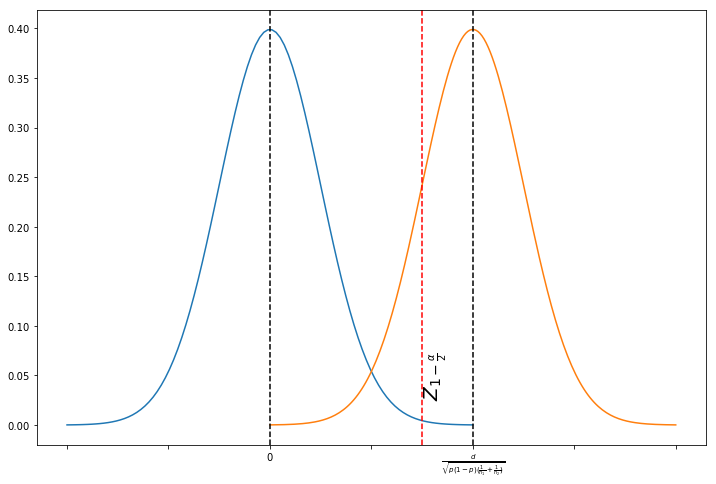

In [89]:
fig,ax = plt.subplots(1, figsize=(12,8))

mu1 = 0
variance1 = 1
sigma1 = math.sqrt(variance1)
x1 = np.linspace(mu1 - 4*sigma1, mu1 + 4*sigma1, 100)
ax.plot(x1, stats.norm.pdf(x1, mu1, sigma1))

mu2 = 4
variance2 = 1
sigma2 = math.sqrt(variance2)
x2 = np.linspace(mu2 - 4*sigma2, mu2 + 4*sigma2, 200)
ax.plot(x2, stats.norm.pdf(x2, mu2, sigma2))

ax.axvline(x=0, color='black', linestyle='--')
ax.axvline(x=4, color='black', linestyle='--')
ax.axvline(x=3, color='red', linestyle='--')
text(3, 0.05, r'$Z_{1-\frac{\alpha}{2}}$', rotation=90, verticalalignment='center',fontsize=20)

ax.set_xticklabels(['', '', '','0','',r'$\frac{d}{\sqrt{{p(1-p)(\frac{1}{n_1} + \frac{1}{n_2})}}}$'])
plt.show()

$Z_{1-\frac{\alpha}{2}} + Z_{1-\beta} = \frac{d}{\sqrt{{p(1-p)(\frac{1}{n_1} + \frac{1}{n_2})}}}$

$n = n_1 = n_2k$

$(Z_{\frac{\alpha}{2}} + Z_{\beta})^2{p(1-p)(\frac{1+k}{n_1}}) = d^2 < Dmin^2$

$\frac{2p(1-p)(Z_{\frac{\alpha}{2}} + Z_{\beta})^2}{d_{min}^2} > n$